In [1]:
from tensorflow.keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)


In [2]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [3]:
train_data.shape

(404, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
#data preparation 
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std 


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 

def build_model():
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model 



In [7]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],axis=0)


    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,			
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    print(history.history.keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [8]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

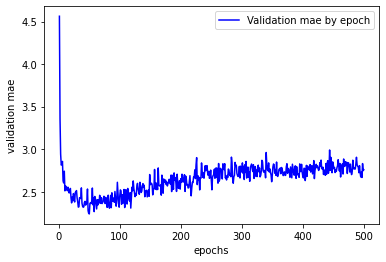

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs+1), average_mae_history, 'b', label='Validation mae by epoch')
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.legend()
plt.show()

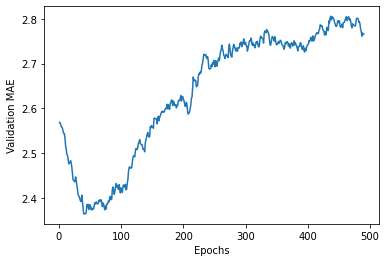

In [14]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
#Training the final model
model = build_model()
model.fit(train_data,
         train_targets,
         epochs=80,
         batch_size=16,
         verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 1ms/step - loss: 18.2075 - mae: 2.6320


In [16]:
test_mse_score

18.207487106323242

In [17]:
test_mae_score

2.631960153579712